<a href="https://colab.research.google.com/github/Seanatist/Seanatist/blob/main/MedicalInsurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [51]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("insurance.csv")

Saving insurance.csv to insurance (1).csv


In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.shape

(1338, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [56]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-2848678123.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


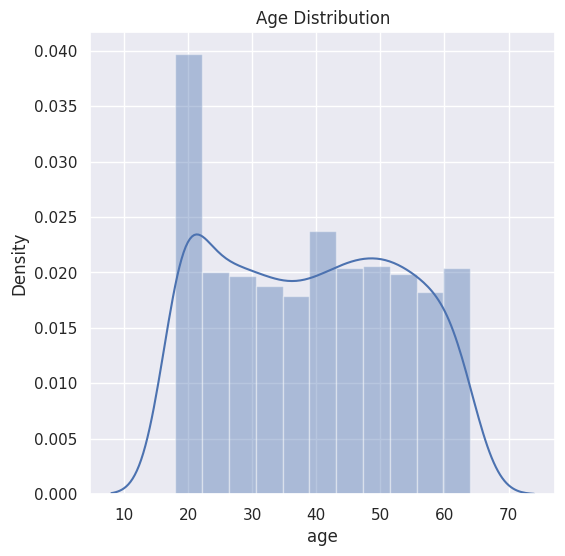

In [57]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("Age Distribution")
plt.show()

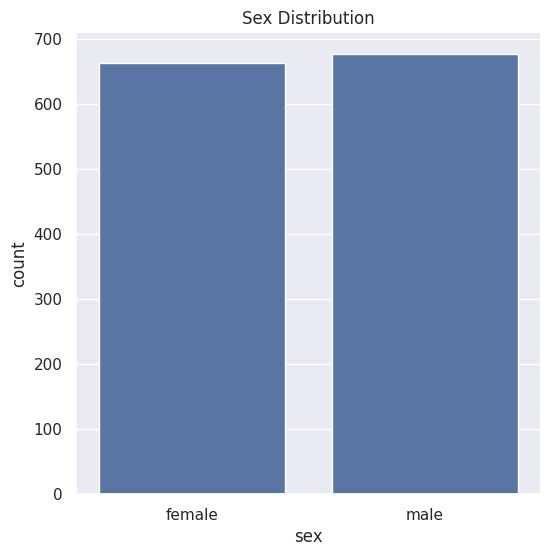

In [58]:
plt.figure(figsize=(6,6))
sns.countplot(x = "sex", data= df)
plt.title("Sex Distribution")
plt.show()

In [59]:
df["sex"].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-2051402887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


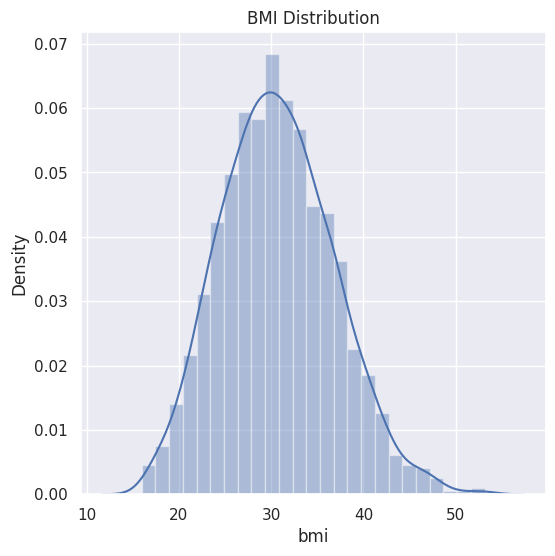

In [60]:
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("BMI Distribution")
plt.show()

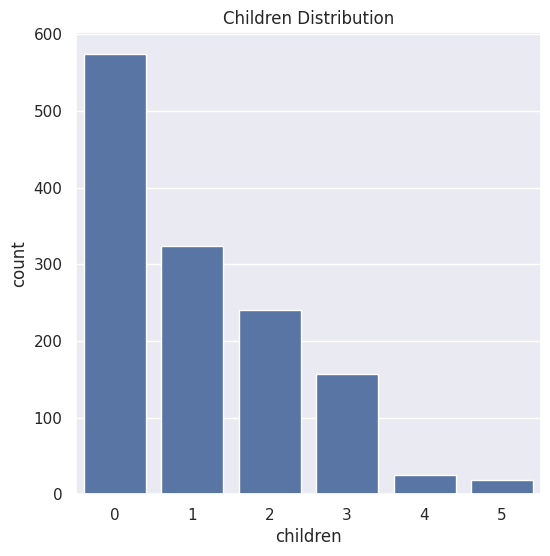

In [61]:
plt.figure(figsize=(6,6))
sns.countplot(x = "children", data = df)
plt.title("Children Distribution")
plt.show()

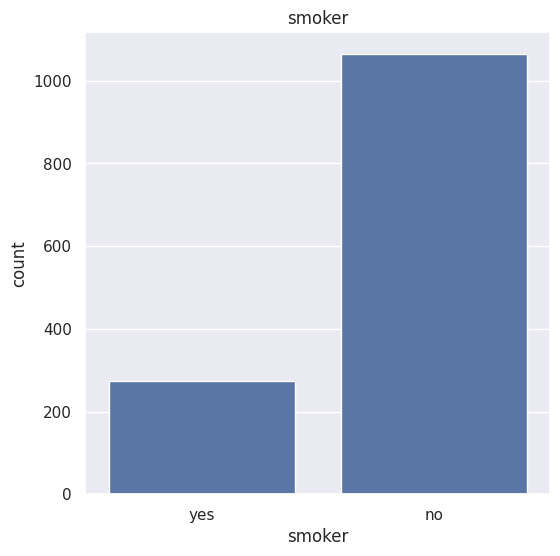

In [62]:
plt.figure(figsize=(6,6))
sns.countplot(x = "smoker", data = df)
plt.title("smoker")
plt.show()

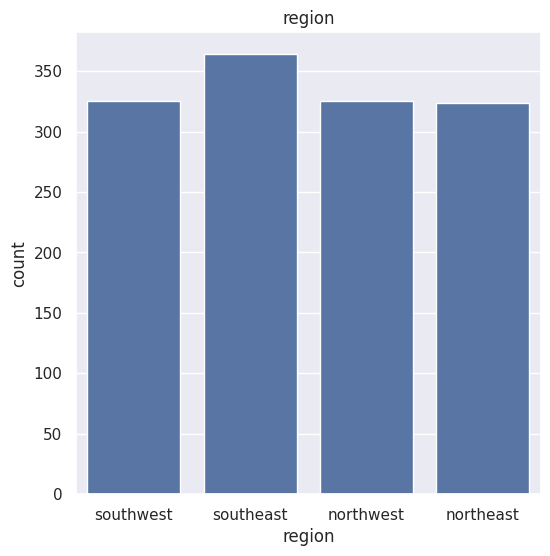

In [63]:
plt.figure(figsize=(6,6))
sns.countplot(x = "region", data = df)
plt.title("region")
plt.show()

In [64]:
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


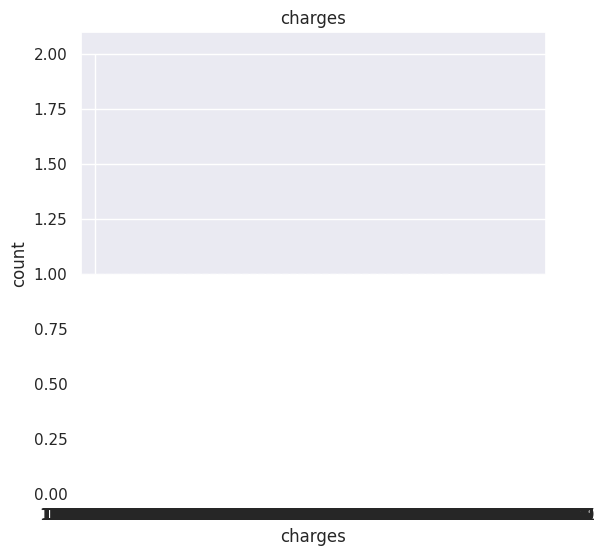

In [65]:
plt.figure(figsize=(6,6))
sns.countplot(x = "charges", data = df)
plt.title("charges")
plt.show()

In [66]:
df.replace({"sex":{"male":0,"female":1}}, inplace=True)
df.replace({"smoker":{"yes":0,"no":1}}, inplace=True)
df.replace({"region":{"southeast":0, "southwest": 1, "northeast":2, "northwest":3}}, inplace = True)

/tmp/ipython-input-1275962607.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sex":{"male":0,"female":1}}, inplace=True)
/tmp/ipython-input-1275962607.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"smoker":{"yes":0,"no":1}}, inplace=True)
/tmp/ipython-input-1275962607.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

In [67]:
x = df.drop(columns="charges", axis=1)
y = df["charges"]

In [68]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [69]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [71]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [72]:
model = LinearRegression()

In [73]:
model.fit(x_train, y_train)

LinearRegression()

In [74]:
training_data_prediction = model.predict(x_train)

In [75]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print("R_squared_value:", r2_train )

R_squared_value: 0.751505643411174


In [76]:
test_data_prediction = model.predict(x_test)

In [77]:
r2_test = metrics.r2_score(y_test, test_data_prediction)
print("R_squared_value:", r2_test )

R_squared_value: 0.7447273869684076


In [80]:
#build a predictive system
input_data = (33,0,22.705,0,1,2)

#changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[3657.70677761]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
